https://www.jianshu.com/p/738f6092ef53

https://blog.csdn.net/sa14023053/article/details/51703204

# 一元线性回归

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname = r"c:\windows\fonts\msyh.ttc",size = 10)

In [13]:
def runplt():
    plt.figure()
    plt.title('披萨价格与直径数据',fontproperties=font)
    plt.xlabel('直径（英寸）',fontproperties=font)
    plt.ylabel('价格（美元）',fontproperties=font)
    plt.axis([0,25,0,25])
    plt.grid(True)
    return plt

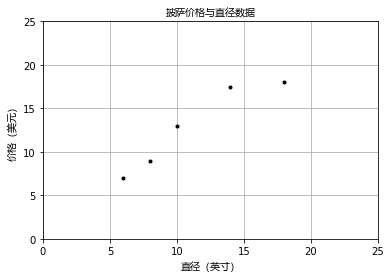

In [14]:
plt = runplt()
X = [[6],[8],[10],[14],[18]]
y = [[7],[9],[13],[17.5],[18]]
plt.plot(X,y,'k.')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(X,y)
model.predict([12][0])

array([[ 13.68103448]])

In [17]:
print ('Price of 12 inch pizza: %.2f' % model.predict([12][0]))

Price of 12 inch pizza: 13.68


LinearRegression 类是一个估计器（estimator）。 

估计器依据观测值来预测结果。 

在 scikit-learn 里面，所有的估计器都带有 fit() 和 predict() 方法。 

fit() 用来分析模型参数，predict() 是通过 fit() 算出的模型参数构成的模型，对解释变量进行预测获得的值。


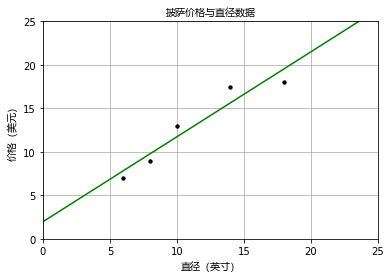

In [18]:
plt = runplt()
plt.plot(X,y,'k.')
X2 = [[0],[10],[14],[25]]
model = LinearRegression()
model.fit(X,y)
y2 = model.predict(X2)
plt.plot(X,y,'k.')
plt.plot(X2,y2,'g-')
plt.show()

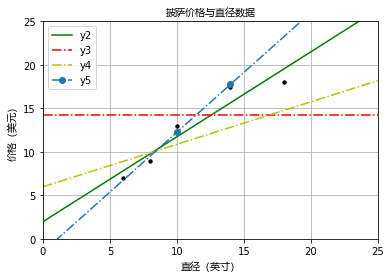

In [19]:
plt = runplt()
plt.plot(X,y,'k.')
y3 = [14.25,14.25,14.25,14.25]
y4 = y2 * 0.5 +5
model.fit(X[1:-1],y[1:-1])
y5 = model.predict(X2)
plt.plot(X,y,'k.')
l1, = plt.plot(X2,y2,'g-')
l2, = plt.plot(X2,y3,'r-.')
l3, = plt.plot(X2,y4,'y-.')
l4, = plt.plot(X2,y5,'o-.')
plt.legend(handles = [l1,l2,l3,l4,], labels = ['y2','y3','y4','y5'], loc = 'best') 
plt.show()

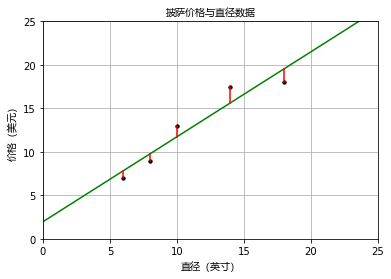

In [20]:
plt = runplt()
plt.plot(X,y,'k.')
X2 = [[0],[10],[14],[25]]
model = LinearRegression()
model.fit(X,y)
y2 = model.predict(X2)
plt.plot(X,y,'k.')
plt.plot(X2,y2,'g-')

yr = model.predict(X)
for idx,x in enumerate(X):
    plt.plot([x,x],[y[idx],yr[idx]],'r-')

plt.show()

## 残差平方和（residual sum of squares）SSE

In [21]:
import numpy as np
np.mean((model.predict(X) - y) ** 2)

1.7495689655172406

### 解一元线性回归的最小二乘法

### 方差:用来衡量样本分散程度

In [22]:
xbar = (6 + 8 + 10 + 14 + 18) / 5
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 
            + (14 - xbar)**2 + (18 - xbar)**2)/4
print (variance)

23.2


In [23]:
print(np.var([6,8,10,14,18],ddof=1))

23.2


ddof 参数是贝塞尔 (无偏估计) 校正系数（Bessel'scorrection），设置为 1，可得样本方差无偏估计量

### 协方差:表示两个变量的总体的变化趋势

现在有了方差和协方差，就可以计算相关系统贝塔了

算出贝塔后，就可以计算阿尔法了

## 模型评估

LinearRegression 的 score 方法可以计算 R 方：

In [24]:
X_test = [[8],[9],[11],[16],[12]]
y_test = [[11],[8.5],[15],[18],[11]]
model = LinearRegression()
model.fit(X,y)
model.score(X_test,y_test)

0.6620052929422553

-------------------------------------

# 多元线性回归

In [25]:
from numpy.linalg import inv
from numpy import dot,transpose

In [26]:
X = [[1,6,2],[1,8,1],[1,10,0],[1,14,2],[1,18,0]]
y = [[7],[9],[13],[17.5],[18]]
print(dot(inv(dot(transpose(X),X)),dot(transpose(X),y)))

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


In [27]:
from numpy.linalg import inv
from numpy import dot,transpose
X = [[1,6,2],[1,8,1],[1,10,0],[1,14,2],[1,18,0]]
y = [[7],[9],[13],[17.5],[18]]
print(dot(inv(dot(transpose(X),X)),dot(transpose(X),y)))
print('******************************')
X = [[6,2],[8,1],[10,0],[14,2],[18,0]]
y = [[7],[9],[13],[17.5],[18]]
model = LinearRegression()
model.fit(X,y)
X_test = [[8,2],[9,0],[11,2],[16,2],[12,0]]
y_test = [[11],[8.5],[15],[18],[11]]
predictions = model.predict(X_test)
for i,predictions in enumerate(predictions):
    print(predictions,y_test[i])    
    print(model.score(X_test,y_test))
    print('--------------------------')

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]
******************************
[ 10.0625] [11]
0.770167773132
--------------------------
[ 10.28125] [8.5]
0.770167773132
--------------------------
[ 13.09375] [15]
0.770167773132
--------------------------
[ 18.14583333] [18]
0.770167773132
--------------------------
[ 13.3125] [11]
0.770167773132
--------------------------


# 多项式回归

## 二次回归（Quadratic Regression），即回归方程有个二次项

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [29]:
X_train = [[6],[8],[10],[14],[18]]
y_train = [[7],[9],[13],[17.5],[18]]
X_test = [[6],[8],[11],[16]]
y_test = [[8],[12],[15],[18]]

In [30]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
xx = np.linspace(0,26,100)
yy = regressor.predict(xx.reshape(xx.shape[0],1))

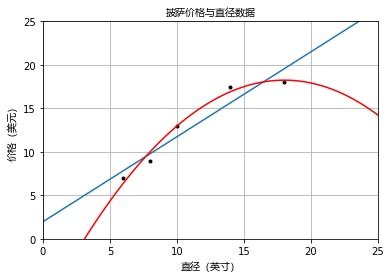

In [33]:
plt = runplt()
plt.plot(X_train,y_train,'k.')
plt.plot(xx,yy)
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic,y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0],1))
plt.plot(xx,regressor_quadratic.predict(xx_quadratic),'r-')
plt.show()

In [35]:
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('1 r-squared', regressor.score(X_test, y_test))
print('2 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))

[[6], [8], [10], [14], [18]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
[[6], [8], [11], [16]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
1 r-squared 0.809726797708
2 r-squared 0.867544365635


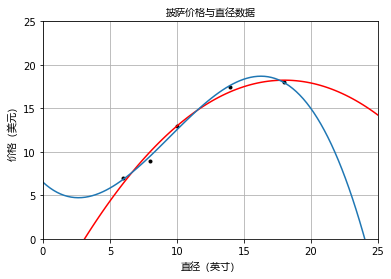

[[  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000000e+02]
 [  1.00000000e+00   8.00000000e+00   6.40000000e+01   5.12000000e+02]
 [  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03]
 [  1.00000000e+00   1.40000000e+01   1.96000000e+02   2.74400000e+03]
 [  1.00000000e+00   1.80000000e+01   3.24000000e+02   5.83200000e+03]]
[[  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000000e+02]
 [  1.00000000e+00   8.00000000e+00   6.40000000e+01   5.12000000e+02]
 [  1.00000000e+00   1.10000000e+01   1.21000000e+02   1.33100000e+03]
 [  1.00000000e+00   1.60000000e+01   2.56000000e+02   4.09600000e+03]]
2 r-squared 0.867544365635
3 r-squared 0.835692415604


In [36]:
plt = runplt()
plt.plot(X_train, y_train, 'k.')

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')

cubic_featurizer = PolynomialFeatures(degree=3)
X_train_cubic = cubic_featurizer.fit_transform(X_train)
X_test_cubic = cubic_featurizer.transform(X_test)
regressor_cubic = LinearRegression()
regressor_cubic.fit(X_train_cubic, y_train)
xx_cubic = cubic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_cubic.predict(xx_cubic))
plt.show()
print(X_train_cubic)
print(X_test_cubic)
print('2 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))
print('3 r-squared', regressor_cubic.score(X_test_cubic, y_test))

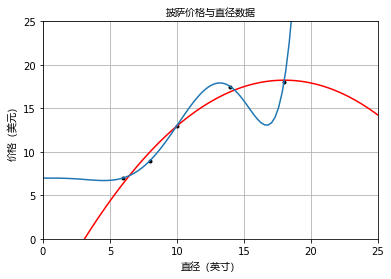

2 r-squared 0.867544365635
7 r-squared 0.491984605687


In [37]:
plt = runplt()
plt.plot(X_train, y_train, 'k.')

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')

seventh_featurizer = PolynomialFeatures(degree=7)
X_train_seventh = seventh_featurizer.fit_transform(X_train)
X_test_seventh = seventh_featurizer.transform(X_test)
regressor_seventh = LinearRegression()
regressor_seventh.fit(X_train_seventh, y_train)
xx_seventh = seventh_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_seventh.predict(xx_seventh))
plt.show()
print( '2 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))
print('7 r-squared', regressor_seventh.score(X_test_seventh, y_test))

### 七次拟合的 R 方值更低,拟合过度（overfitting）

------------------------------------------------

# 正则化（Regularization）用来防止拟合过度

### 岭回归 (Ridge Regression，RR，也叫 Tikhonov regularization)
通过放弃最小二乘法的无偏性，以损失部分信息、降低精度为代价获得回归系数更为符合实际、更可靠的回归方法。

### 选择算子 (Least absolute shrinkage and selection operator,LASSO)

### 梯度下降法
被比喻成一种方法，一个人蒙着眼睛去找从山坡到溪谷最深处的路。 他看不到地形图，所以只能沿着最陡峭的方向一步一步往前走。 每一步的大小与地势陡峭的程度成正比。 如果地势很陡 峭，他就走一大步，因为他相信他仍在高出，还没有错过溪谷的最低点。 如果地势比较平坦，他就走一小步。 这时如果再走大步，可能会与最低点失之交臂。 如果真那样，他就需要改变方向，重新朝着溪谷的最低点前进。 他就这样一步一步的走啊走，直到有一个点走不动了，因为路是平的了，于是他卸下眼罩，已经到了谷底深处。

In [40]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))
regressor = SGDRegressor(loss='squared_loss',penalty="l1")
scores = cross_val_score(regressor, X_train, y_train.reshape(-1, 1), cv=5)
print('cv R', scores)
print('mean of cv R', np.mean(scores))
regressor.fit(X_train, y_train)
print('Test set R', regressor.score(X_test, y_test))

cv R [ 0.57381034  0.7112928   0.71232967  0.57986528  0.77725337]
mean of cv R 0.670910292601
Test set R 0.794230285306


C:\Users\David\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\David\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\David\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 